# Section 1

Generating our data: a small dataset with in-distribution (IND) datapoints and a clearly separated out-of-distribution (OOD) cluster that we will use to test our models performance on unseen data. 

In [1]:
# 1. imports and set-up

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split 

plt.rcParams['figure.figsize'] = (6.2, 5.2)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

rng = np.random.RandomState(42)


# 2. generate our IND data - two interlocking half circles (moons)
X_all, y_all = make_moons(n_samples=600, noise=0.2, random_state=rng)

X_train, X_ind_test, y_train, y_ind_test = train_test_split(
    X_all, y_all, test_size=0.3, random_state=rng, stratify=y_all
)


# 3. generate OOD data - separate gaussian cluster
X_ood = rng.normal(loc=[3.4, 3.0], scale=[0.35, 0.35], size=(120, 2))


# 4. print shape summary
print("Shapes:",
        "Train:", X_train.shape,
        "IND test:", X_ind_test.shape,
        "OOD test:", X_ood.shape
)


Shapes: Train: (420, 2) IND test: (180, 2) OOD test: (120, 2)


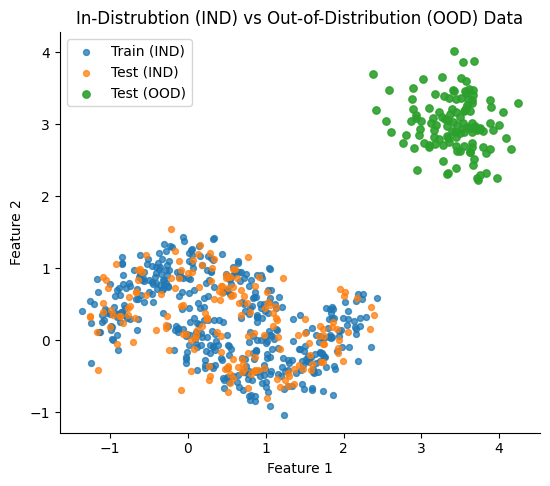

In [2]:
X_train_plot = X_train
X_test_plot = X_ind_test

fig, ax = plt.subplots()

ax.scatter(X_train_plot[:, 0], X_train_plot[:, 1], s=18, label='Train (IND)', alpha=0.75)
ax.scatter(X_test_plot[:, 0], X_test_plot[:, 1], s=18, label='Test (IND)', alpha=0.75)
ax.scatter(X_ood[:, 0], X_ood[:, 1], s=28, label='Test (OOD)', alpha=0.9)

ax.set_title("In-Distrubtion (IND) vs Out-of-Distribution (OOD) Data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()
plt.show()

In [5]:
import os, joblib 

os.makedirs("artifacts", exist_ok=True)

# save arrays
np.save("artifacts/X_train.npy", X_train)
np.save("artifacts/y_train.npy", y_train)
np.save("artifacts/X_ind_test.npy", X_ind_test)
np.save("artifacts/y_ind_test.npy", y_ind_test)
np.save("artifacts/X_ood.npy", X_ood)

# save as a csv for easy viewing and also for streamlit demos 
pd.DataFrame(np.c_[X_train, y_train], columns=["x1", "x2", "y"]).to_csv("artifacts/train_data.csv", index=False)
pd.DataFrame(np.c_[X_ind_test, y_ind_test], columns=["x1", "x2", "y"]).to_csv("artifacts/test_ind_data.csv", index=False)
pd.DataFrame(X_ood, columns=["x1", "x2"]).to_csv("artifacts/ood_data.csv", index=False)

print("Saved data to artifacts/ folder")

Saved data to artifacts/ folder
